In [1]:
#Working with a single file
import pyart
import os
import sys
from glob import glob
import platform
import copy
import netCDF4
import datetime
import numpy as np
from matplotlib import pyplot as plt
from boto.s3.connection import S3Connection
import boto3
import tempfile

%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<Key: noaa-nexrad-level2,2017/09/08/KAMX/KAMX20170908_143411_V06>
Unfolding


/Users/scollis/anaconda3/envs/cmac_env/lib/python3.6/site-packages/pyart/correct/phase_proc.py:188: RuntimeWarning: invalid value encountered in sqrt
  noise = smooth_and_trim(np.sqrt((line - signal) ** 2), window_len=wl)
/Users/scollis/anaconda3/envs/cmac_env/lib/python3.6/site-packages/pyart/correct/phase_proc.py:189: RuntimeWarning: divide by zero encountered in true_divide
  return abs(signal) / noise


Exec time:  12.284800052642822
Doing  0


/Users/scollis/anaconda3/envs/cmac_env/lib/python3.6/site-packages/pyart/correct/phase_proc.py:589: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  sct[np.where(sct < 0.0)] = 0.0


Doing  1
Doing  2
Doing  3
Doing  4
Doing  5
Doing  6
Doing  7
Doing  8
Doing  9
Doing  10
Doing  11
Doing  12
Doing  13
Doing  14
Doing  15
min_lat: 21.4817326742  min_lon: -84.992839617  max_lat: 29.7404407985  max_lon: -75.8324842011
Friday September 08 at 02:34 PM GMT
min_lat: 21.4817326742  min_lon: -84.992839617  max_lat: 29.7404407985  max_lon: -75.8324842011
Friday September 08 at 02:34 PM GMT
min_lat: 21.4817326742  min_lon: -84.992839617  max_lat: 29.7404407985  max_lon: -75.8324842011
Friday September 08 at 02:34 PM GMT
min_lat: 21.4817326742  min_lon: -84.992839617  max_lat: 29.7404407985  max_lon: -75.8324842011
Friday September 08 at 02:34 PM GMT


('kamx_irma/2017/09/08/kamx_vr_20170908_1434.png',
 '/var/folders/_y/mnq6xy3j6zlgnl_kk55wqm7nbtkpwv/T/tmpz8598iqa.png')

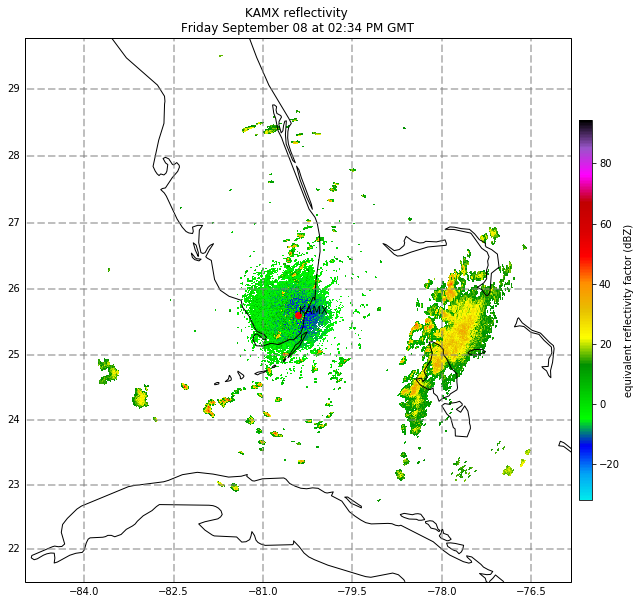

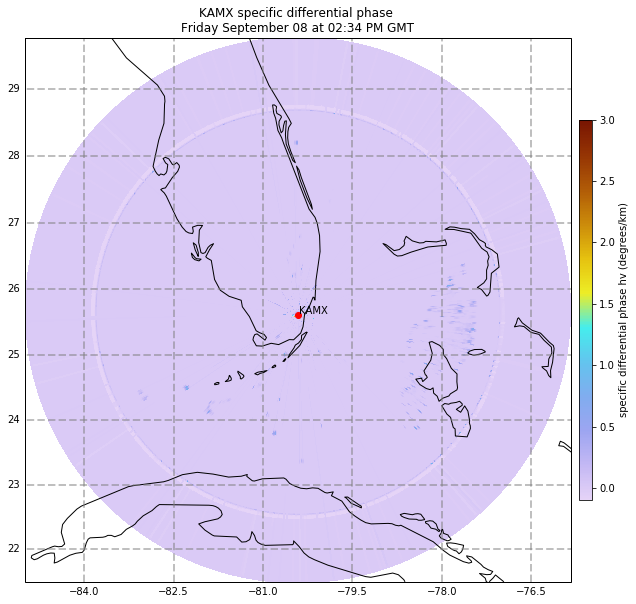

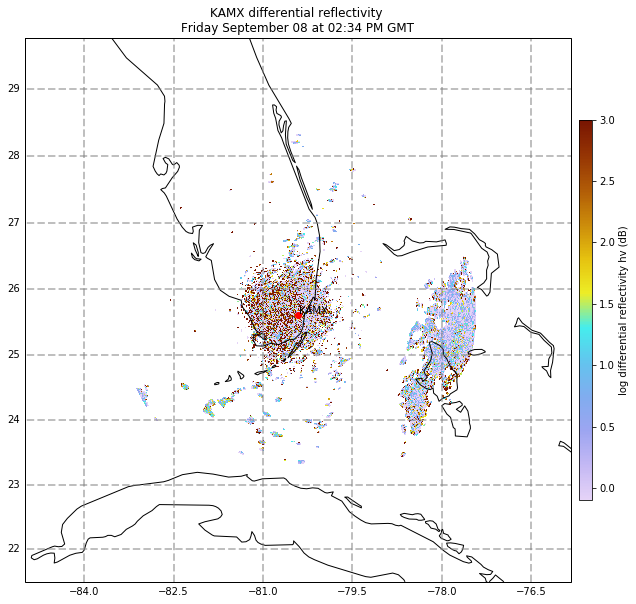

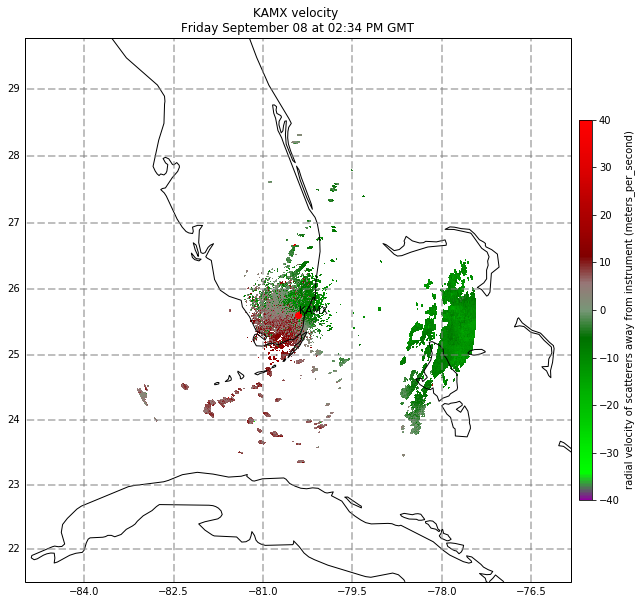

In [31]:
import imp
lib_loc = os.path.join(os.path.expanduser('~'), 'unfunded_projects/realtimeradar/code/processing_code.py')
radar_codes = imp.load_source('radar_codes', lib_loc)
station = 'KAMX'
my_datetime = datetime.datetime.utcnow()
radar = radar_codes.get_radar_from_aws(station, my_datetime)

kdp_top = 10000.
coh_pwr = copy.deepcopy(radar.fields['differential_phase'])
coh_pwr['data'] = coh_pwr['data']*0.+1.
radar.fields['NCP'] = coh_pwr
phidp,kdp = pyart.correct.phase_proc_lp(radar,0.0,
                                      refl_field='reflectivity',
                                      LP_solver='cylp',
                                      ncp_field='NCP',
                                      rhv_field='cross_correlation_ratio',
                                      phidp_field='differential_phase',
                                      fzl = kdp_top,
                                      coef=.87,
                                      low_z=25., debug=True)
radar.fields['cylp_processed_phase'] = phidp
radar.fields['specific_differential_phase'] = kdp

radar_codes.save_latest_kamx_z_png_s3(radar)
radar_codes.save_latest_kamx_kdp_png_s3(radar)
radar_codes.save_latest_kamx_zdr_png_s3(radar)
radar_codes.save_latest_kamx_vr_png_s3(radar)

